## Основы языка Python для аналитиков (семинары)
### Урок 4. Визуальный анализ данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns

In [2]:
# https://stackoverflow.com/questions/49188960/how-to-show-all-columns-names-on-a-large-pandas-dataframe
# You can globally set printing options. This will allow you to see all column names & rows when you are doing .head().
# None of the column name will be truncated.
pd.options.display.max_columns = None
pd.options.display.max_rows = None

### Задача 1

#### Скачать файл в уроке kc_house_data.csv и считать данные с помощью pandas

In [3]:
df = pd.read_csv("./kc_house_data.csv")

Описание датасета:

The dataset contains house sale prices for King County, which includes Seattle. It includes home sold between May 2014 and May 2015

Описание столбцов:

**id** :a notation for a house<br>
**date**: Date house was sold (Дата дом был продан)<br>
**price**: Price is prediction target (Цена является прогнозной целью)<br>
**bedrooms**: Number of Bedrooms/House (Количество спален)<br>
**bathrooms**: Number of bathrooms/bedrooms (Количество ванных комнат)<br>
**sqft_living**: square footage of the home (Площадь дома)<br>
**sqft_lot**: square footage of the lot (Площадь дома со двором)<br>
**floors**:Total floors (levels) in house (Общее количество этажей (уровней) в доме)<br>
**waterfront**: House which has a view to a waterfront (Дом с видом на набережную)<br>
**view**: Has been viewed (Вид)<br>
**condition**: How good the condition is Overall (Насколько хорошее состояние в целом)<br>
**grade**: overall grade given to the housing unit, based on King County grading system (общий класс, присвоенный жилищной единице)<br>
**sqft_above**:square footage of house apart from basement (Площадь дома без подвала)<br>
**sqft_basement**: square footage of the basement (Площадь подвала)<br>
**yr_built**: Built Year (Год постройки)<br>
**yr_renovated**:Year when house was renovated (Год, когда дом был отремонтирован)<br>
**zipcode**:zip code (Индекс)<br>
**lat**: Latitude coordinate (Координата широты)<br>
**long**: Longitude coordinate (Координата долготы)<br>
**sqft_living15**: Living room area in 2015 (implies-- some renovations) This might or might not have affected the lotsize area (Площадь гостиной в 2015 году (подразумевает - некоторые ремонты) Это могло повлиять или не повлиять на площадь lotsize)<br>
**sqft_lot15**: lotSize area in 2015 (implies-- some renovations) (Площадь lotSize в 2015 году (подразумевается - некоторые ремонтные работы))<br>
Примечание:<br>
1 (square foot) = 0.09290304 square meters

Изучите стоимости недвижимости

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

2   price          21613 non-null  float64

In [6]:
df.shape

(21613, 21)

In [7]:
round(df.price.min(), 2), round(df.price.max(), 2), round(df.price.mean(), 2)

(75000.0, 7700000.0, 540088.14)

In [8]:
df.price.value_counts().shape[0]

4028

In [9]:
df.groupby(['price']).size().reset_index(name='counts').shape[0]

4028

Наверно для 'price' будет идеальное значение bin=4028

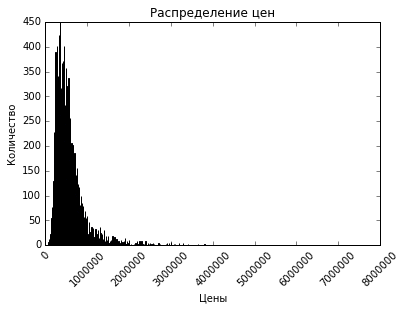

In [10]:
plt.figure(figsize=(6, 4))
plt.hist(df['price'], bins=1000)
plt.title('Распределение цен')
plt.xlabel('Цены')
plt.ylabel('Количество')
plt.ticklabel_format(style='plain')  # Prevent scientific notation in matplotlib.pyplot
plt.xticks(rotation=45);

Как-то всё сжато. Нужно растянуть.

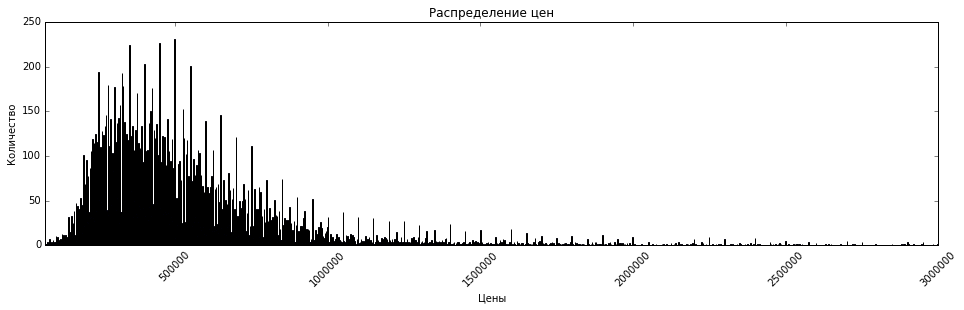

In [11]:
plt.figure(figsize=(16, 4))
plt.hist(df['price'], bins=4000)
plt.title('Распределение цен')
plt.xlabel('Цены')
plt.ylabel('Количество')
plt.ticklabel_format(style='plain')  # Prevent scientific notation in matplotlib.pyplot
plt.xlim (75000, 3000000)
plt.xticks(rotation=45);

В зависимости от бинов очень отличается параметры количества по оси Y

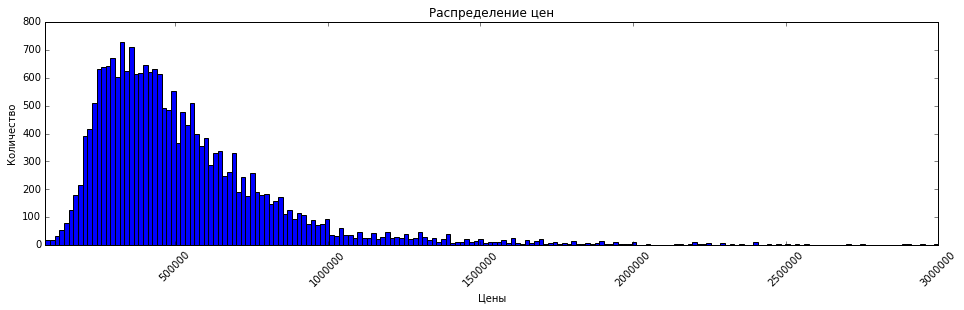

In [12]:
plt.figure(figsize=(16, 4))
plt.hist(df['price'], bins=500)
plt.title('Распределение цен')
plt.xlabel('Цены')
plt.ylabel('Количество')
plt.ticklabel_format(style='plain')  # Prevent scientific notation in matplotlib.pyplot
plt.xlim (75000, 3000000)
plt.xticks(rotation=45);

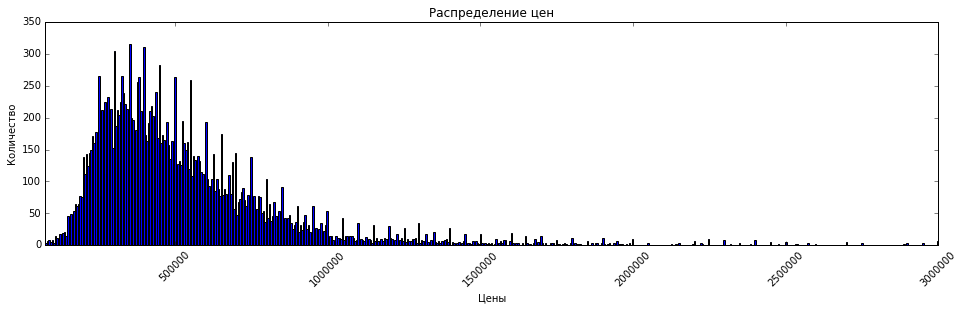

In [13]:
plt.figure(figsize=(16, 4))
plt.hist(df['price'], bins=1500)
plt.title('Распределение цен')
plt.xlabel('Цены')
plt.ylabel('Количество')
plt.ticklabel_format(style='plain')  # Prevent scientific notation in matplotlib.pyplot
plt.xlim (75000, 3000000)
plt.xticks(rotation=45);

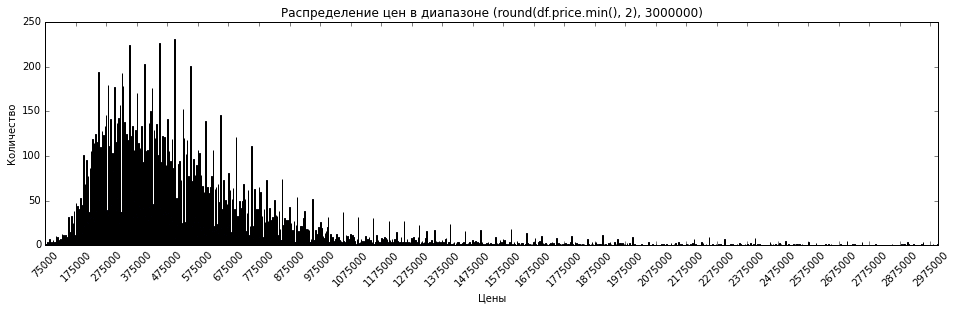

In [14]:
plt.figure(figsize=(16, 4))
plt.hist(df['price'], bins=4000)
plt.title('Распределение цен в диапазоне (round(df.price.min(), 2), 3000000)')
plt.xlabel('Цены')
plt.ylabel('Количество')
plt.ticklabel_format(style='plain')  # Prevent scientific notation in matplotlib.pyplot
plt.xlim (round(df.price.min(), 2), 3000001)
plt.xticks(rotation=45)
# Changing the tick frequency on the x or y axis
# plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xticks(np.arange(round(df.price.min(), 2), 3000000+1, 100000.0));

что-то уже более менее понятное

Диапазон цен (0, 3000000)

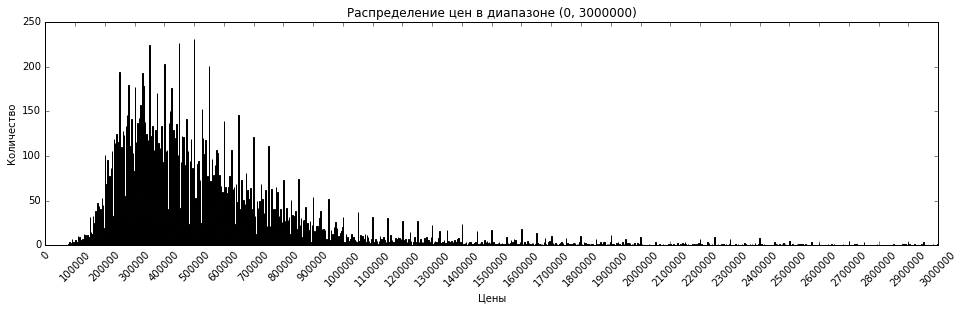

In [15]:
plt.figure(figsize=(16, 4))
plt.hist(df['price'], bins=4000)
plt.title('Распределение цен в диапазоне (0, 3000000)')
plt.xlabel('Цены')
plt.ylabel('Количество')
plt.ticklabel_format(style='plain')  # Prevent scientific notation in matplotlib.pyplot
plt.xlim (0, 3000000)
plt.xticks(rotation=45)
# Changing the tick frequency on the x or y axis
# plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xticks(np.arange(0, 3000000+1, 100000.0));

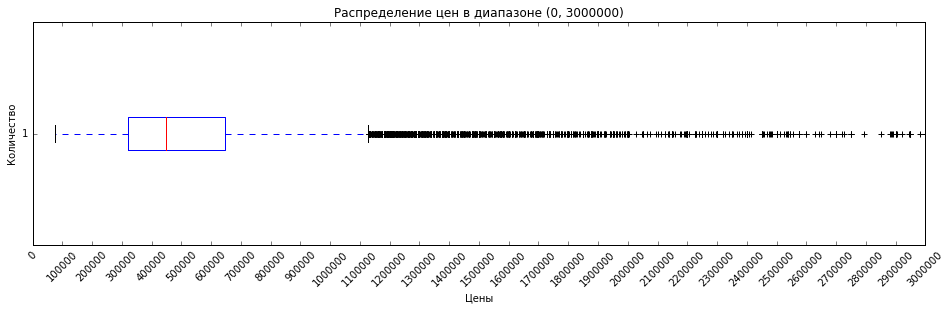

In [16]:
plt.figure(figsize=(16, 4))
plt.boxplot(df['price'], vert=False)  # vert - If True (default), makes the boxes vertical. If False, everything is drawn horizontally.
plt.title('Распределение цен в диапазоне (0, 3000000)')
plt.xlabel('Цены')
plt.ylabel('Количество')
#plt.ticklabel_format(style='plain')  # Prevent scientific notation in matplotlib.pyplot
plt.xlim (0, 3000000)
plt.xticks(rotation=45)
# Changing the tick frequency on the x or y axis
# plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xticks(np.arange(0, 3000000+1, 100000.0));

In [17]:
df[df["price"] <= 3000000].shape[0]

21568

Диапазон цен (3000000, round(df.price.max(), 2))

In [18]:
df[df["price"] > 3000000].groupby(['price']).size().reset_index(name='counts').shape[0]

34

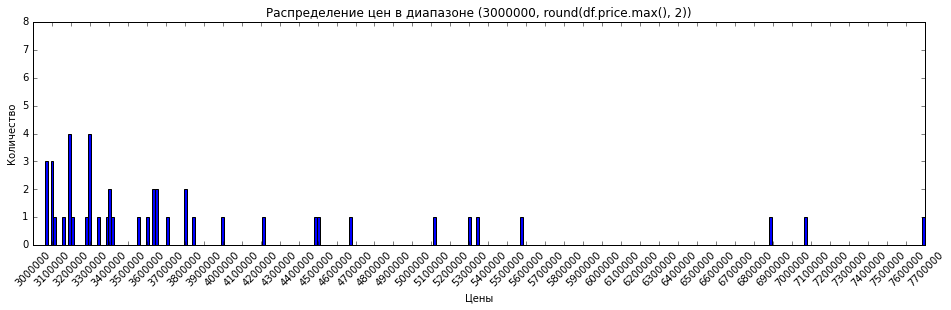

In [19]:
plt.figure(figsize=(16, 4))
plt.hist(df['price'], bins=500)
plt.title('Распределение цен в диапазоне (3000000, round(df.price.max(), 2))')
plt.xlabel('Цены')
plt.ylabel('Количество')
plt.ticklabel_format(style='plain')  # Prevent scientific notation in matplotlib.pyplot
plt.xlim (3000000, round(df.price.max(), 2)+1)
plt.ylim (0, 8)
plt.xticks(rotation=45)
# Changing the tick frequency on the x or y axis
# plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xticks(np.arange(3000000, round(df.price.max(), 2)+1, 100000.0));

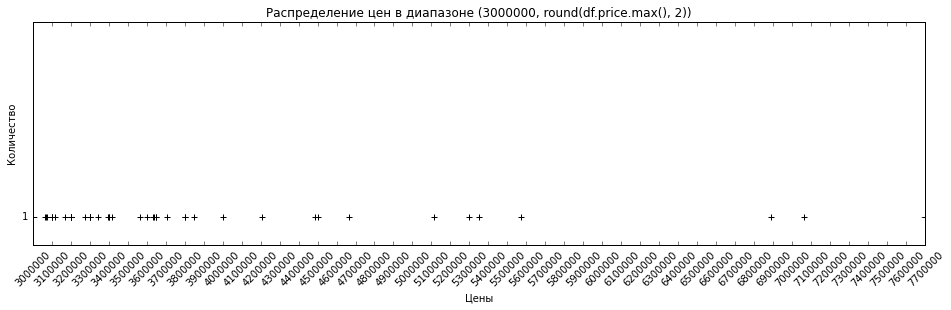

In [20]:
plt.figure(figsize=(16, 4))
plt.boxplot(df['price'], vert=False)  # vert - If True (default), makes the boxes vertical. If False, everything is drawn horizontally.
plt.title('Распределение цен в диапазоне (3000000, round(df.price.max(), 2))')
plt.xlabel('Цены')
plt.ylabel('Количество')
#plt.ticklabel_format(style='plain')  # Prevent scientific notation in matplotlib.pyplot
plt.xlim (3000000, round(df.price.max(), 2)+1)
plt.ylim (0, 8)
plt.xticks(rotation=45)
# Changing the tick frequency on the x or y axis
# plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xticks(np.arange(3000000, round(df.price.max(), 2)+1, 100000.0));

что-то в диапазоне цен (3000000, round(df.price.max(), 2)) мало домов (45 штук)

In [21]:
df[df["price"] > 3000000].shape[0]

45

Изучите распределение квадратуры жилой

In [22]:
df.sqft_living.min(), df.sqft_living.max(), round(df.sqft_living.mean(), 3)

(290, 13540, 2079.9)

In [23]:
df.sqft_living.value_counts().shape[0]

1038

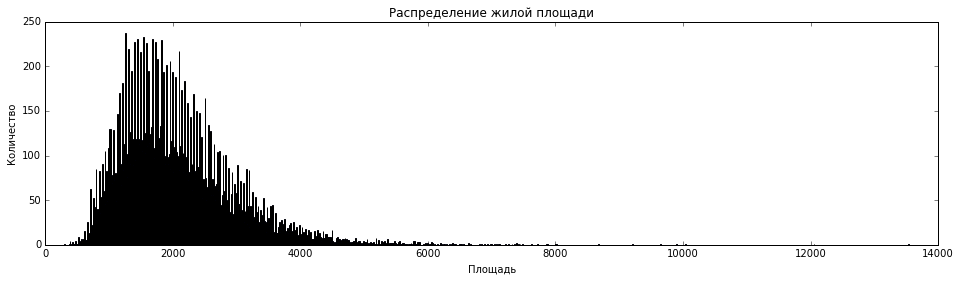

In [24]:
plt.figure(figsize=(16, 4))
plt.hist(df['sqft_living'], bins=1038)
plt.title('Распределение жилой площади')
plt.xlabel('Площадь')
plt.ylabel('Количество')
plt.ticklabel_format(style='plain');  # Prevent scientific notation in matplotlib.pyplot
# plt.xlim (0, 3000000)
# plt.xticks(rotation=45)
# # Changing the tick frequency on the x or y axis
# # plt.xticks(np.arange(min(x), max(x)+1, 1.0))
# plt.xticks(np.arange(0, 3000000+1, 100000.0));

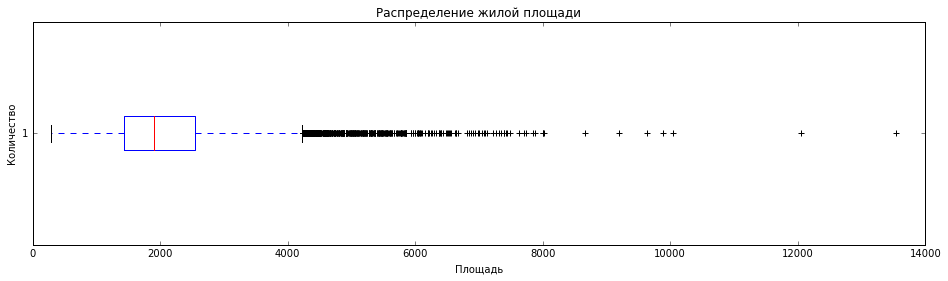

In [25]:
plt.figure(figsize=(16, 4))
plt.boxplot(df['sqft_living'], vert=False)  # vert - If True (default), makes the boxes vertical. If False, everything is drawn horizontally.
plt.title('Распределение жилой площади')
plt.xlabel('Площадь')
plt.ylabel('Количество');
#plt.ticklabel_format(style='plain')  # Prevent scientific notation in matplotlib.pyplot
# plt.xlim (0, 3000000)
# plt.xticks(rotation=45)
# # Changing the tick frequency on the x or y axis
# # plt.xticks(np.arange(min(x), max(x)+1, 1.0))
# plt.xticks(np.arange(0, 3000000+1, 100000.0));

In [26]:
df[df["sqft_living"] > 6000].shape[0]

68

In [27]:
df[df["sqft_living"] <= 6000].groupby(['sqft_living']).size().reset_index(name='counts').shape[0]

974

In [28]:
df[df["sqft_living"] > 6000].groupby(['sqft_living']).size().reset_index(name='counts').shape[0]

64

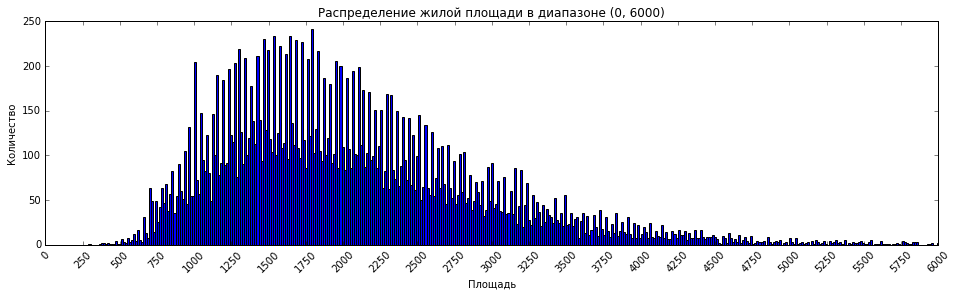

In [29]:
plt.figure(figsize=(16, 4))
plt.hist(df['sqft_living'], bins=974)
plt.title('Распределение жилой площади в диапазоне (0, 6000)')
plt.xlabel('Площадь')
plt.ylabel('Количество')
plt.ticklabel_format(style='plain');  # Prevent scientific notation in matplotlib.pyplot
plt.xlim (0, 6000)
plt.xticks(rotation=45)
# # Changing the tick frequency on the x or y axis
# # plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xticks(np.arange(0, 6000+1, 250.0));

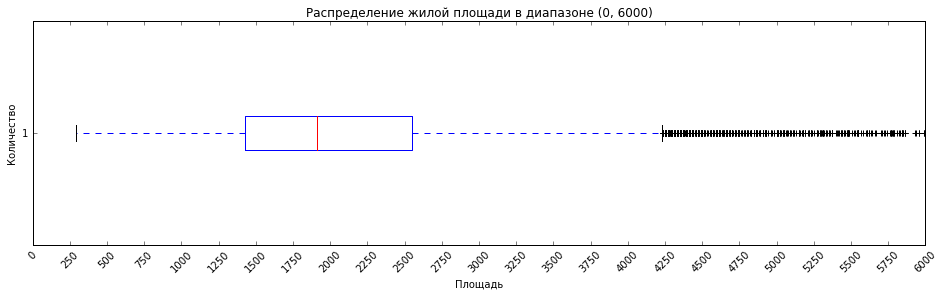

In [30]:
plt.figure(figsize=(16, 4))
plt.boxplot(df['sqft_living'], vert=False)  # vert - If True (default), makes the boxes vertical. If False, everything is drawn horizontally.
plt.title('Распределение жилой площади в диапазоне (0, 6000)')
plt.xlabel('Площадь')
plt.ylabel('Количество');
#plt.ticklabel_format(style='plain')  # Prevent scientific notation in matplotlib.pyplot
plt.xlim (0, 6000)
plt.xticks(rotation=45)
# # Changing the tick frequency on the x or y axis
# # plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xticks(np.arange(0, 6000+1, 250.0));

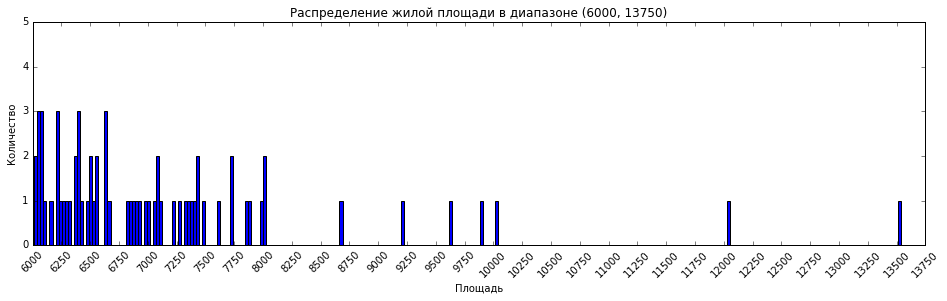

In [31]:
plt.figure(figsize=(16, 4))
plt.hist(df['sqft_living'], bins=500)
plt.title('Распределение жилой площади в диапазоне (6000, 13750)')
plt.xlabel('Площадь')
plt.ylabel('Количество')
plt.ticklabel_format(style='plain');  # Prevent scientific notation in matplotlib.pyplot
plt.xlim (6000, 13750)
plt.ylim (0, 5)
plt.xticks(rotation=45)
# # Changing the tick frequency on the x or y axis
# # plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xticks(np.arange(6000, 13750+1, 250.0));

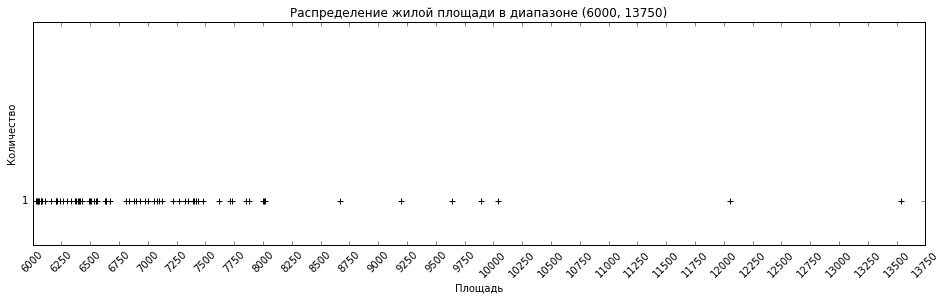

In [32]:
plt.figure(figsize=(16, 4))
plt.boxplot(df['sqft_living'], vert=False)  # vert - If True (default), makes the boxes vertical. If False, everything is drawn horizontally.
plt.title('Распределение жилой площади в диапазоне (6000, 13750)')
plt.xlabel('Площадь')
plt.ylabel('Количество');
#plt.ticklabel_format(style='plain')  # Prevent scientific notation in matplotlib.pyplot
plt.xlim (6000, 13750)
plt.ylim (0, 5)
plt.xticks(rotation=45)
# # Changing the tick frequency on the x or y axis
# # plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xticks(np.arange(6000, 13750+1, 250.0));

Изучите распределение года постройки

In [33]:
df.yr_built.min(), df.yr_built.max(), round(df.yr_built.mean(), 3)

(1900, 2015, 1971.005)

In [34]:
df.yr_built.value_counts().shape[0]

116

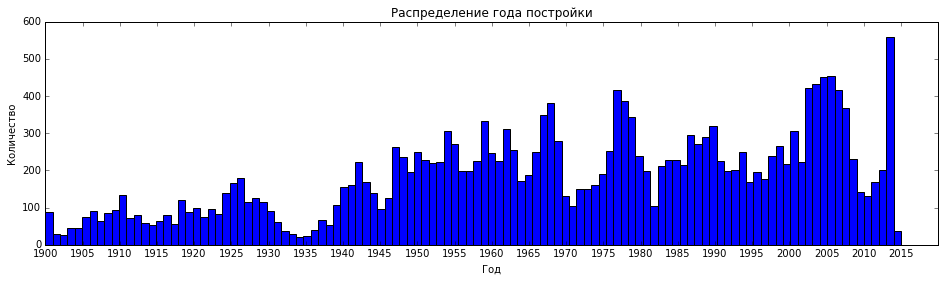

In [35]:
plt.figure(figsize=(16, 4))
plt.hist(df['yr_built'], bins=116)
plt.title('Распределение года постройки')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.ticklabel_format(style='plain');  # Prevent scientific notation in matplotlib.pyplot
# plt.xlim (1899, 2016)
# plt.xticks(rotation=45)
# # Changing the tick frequency on the x or y axis
# # plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xticks(np.arange(1900, 2015+1, 5.0));

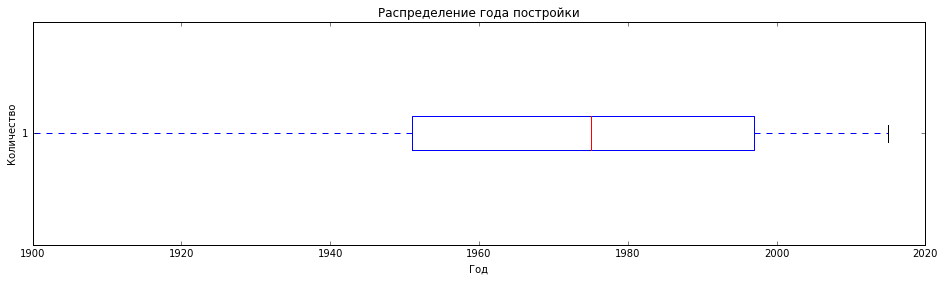

In [36]:
plt.figure(figsize=(16, 4))
plt.boxplot(df['yr_built'], vert=False)  # vert - If True (default), makes the boxes vertical. If False, everything is drawn horizontal
plt.title('Распределение года постройки')
plt.xlabel('Год')
plt.ylabel('Количество');
#plt.ticklabel_format(style='plain');  # Prevent scientific notation in matplotlib.pyplot
# plt.xlim (0, 3000000)
# plt.xticks(rotation=45)
# # Changing the tick frequency on the x or y axis
# # plt.xticks(np.arange(min(x), max(x)+1, 1.0))
# plt.xticks(np.arange(0, 3000000+1, 100000.0));

### Задача 2

Изучите распределение домов от наличия вида на набережную<br>
Постройте график<br>
Сделайте выводы

In [37]:
df.waterfront.value_counts().shape[0]

2

In [38]:
waterfront_counts = df['waterfront'].value_counts().reset_index()
waterfront_counts.head()

,index,waterfront
0,0,21450
1,1,163


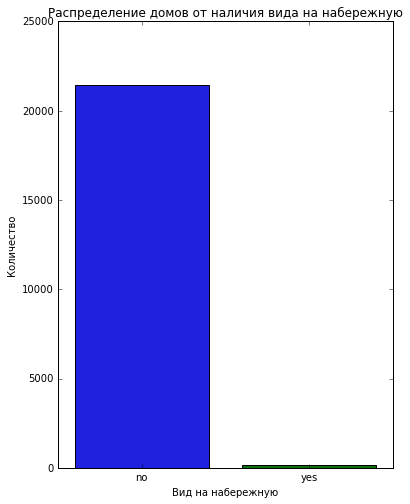

In [39]:
plt.figure(figsize=(6, 8))
sns.barplot(x=waterfront_counts['index'], y=waterfront_counts['waterfront'])
plt.title('Распределение домов от наличия вида на набережную')
plt.xlabel('Вид на набережную')
plt.ylabel('Количество')
plt.xticks([0, 1], ['no', 'yes']);

In [40]:
waterfront_counts = df['waterfront'].value_counts()
waterfront_counts.index = ['no', 'yes']
waterfront_counts.head()

no     21450
yes      163
Name: waterfront, dtype: int64

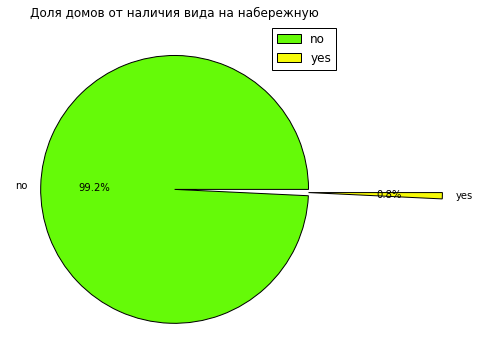

In [41]:
plt.figure(figsize=(6, 6))
explode = [0, 1]
# plt.pie(waterfront_counts, autopct='%1.1f%%')
plt.pie(waterfront_counts.values, autopct='%1.1f%%', labels=waterfront_counts.index, explode=explode, colors = ["#63fa05fb", "#f6fa05fb",])
plt.title('Доля домов от наличия вида на набережную')
plt.legend(waterfront_counts.index);

По графику видно что преобладающее количество домов далеко от набережной.

Изучите распределение этажей домов

In [42]:
df.floors.value_counts().shape[0]

6

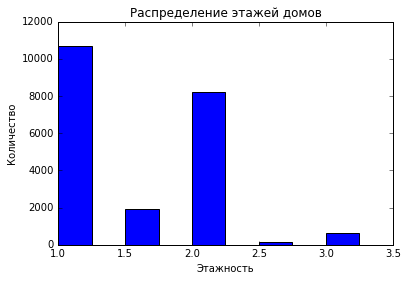

In [43]:
plt.figure(figsize=(6, 4))
plt.hist(df['floors'])
plt.title('Распределение этажей домов')
plt.xlabel('Этажность')
plt.ylabel('Количество');
# plt.ticklabel_format(style='plain');  # Prevent scientific notation in matplotlib.pyplot
# plt.xlim (1899, 2016)
# plt.xticks(rotation=45)
# # Changing the tick frequency on the x or y axis
# # plt.xticks(np.arange(min(x), max(x)+1, 1.0))
# plt.xticks(np.arange(1900, 2015+1, 5.0));

In [44]:
floors_counts = df.floors.value_counts()

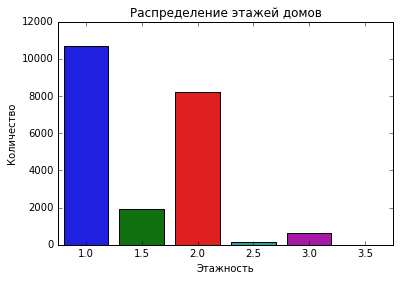

In [45]:
plt.figure(figsize=(6, 4))
sns.barplot(x=floors_counts.index, y=floors_counts.values)
plt.title('Распределение этажей домов')
plt.xlabel('Этажность')
plt.ylabel('Количество');
# plt.ticklabel_format(style='plain');  # Prevent scientific notation in matplotlib.pyplot
# plt.xlim (1899, 2016)
# plt.xticks(rotation=45)
# # Changing the tick frequency on the x or y axis
# # plt.xticks(np.arange(min(x), max(x)+1, 1.0))
# plt.xticks(np.arange(1900, 2015+1, 5.0));

In [46]:
floors_counts = df['floors'].value_counts()
# floors_counts.index = ['no', 'yes']
floors_counts

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

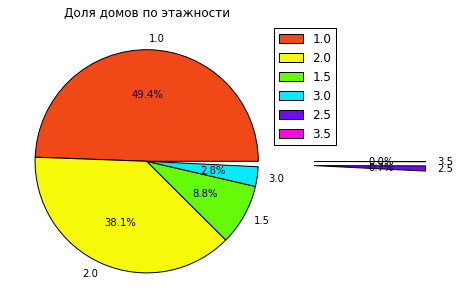

In [47]:
plt.figure(figsize=(5, 5))
explode = [0, 0, 0, 0, 1.5, 1.5 ]
# plt.pie(waterfront_counts, autopct='%1.1f%%')
plt.pie(floors_counts.values, autopct='%1.1f%%', labels=floors_counts.index, explode=explode, colors = ["#f04816", "#f6fa05fb", "#63fa05fb", "#05eafafb", "#6f05fafb", "#fa05e1fb",])
plt.title('Доля домов по этажности')
plt.legend(floors_counts.index, loc='best', bbox_to_anchor=(0.7, 0.5, 0.5, 0.5)); # If a 4-tuple or BboxBase is given, then it specifies the bbox (x, y, width, height) that the legend is placed in. 

Видно что у нас имеется большинство 1 и 2-х єтажніх домов.

Изучите распределение состояния домов

In [48]:
df.grade.value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

In [49]:
df.grade.value_counts().shape[0]

12

In [50]:
df.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1], dtype=int64)

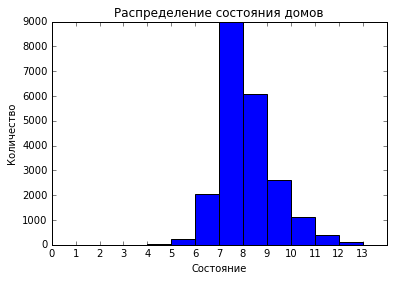

In [51]:
plt.figure(figsize=(6, 4))
plt.hist(df['grade'], bins=12)
plt.title('Распределение состояния домов')
plt.xlabel('Состояние')
plt.ylabel('Количество');
# plt.ticklabel_format(style='plain');  # Prevent scientific notation in matplotlib.pyplot
# plt.xlim (1899, 2016)
# plt.xticks(rotation=45)
# # Changing the tick frequency on the x or y axis
# # plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xticks(np.arange(0, 14, 1.0));

In [52]:
grade_counts = df.grade.value_counts()

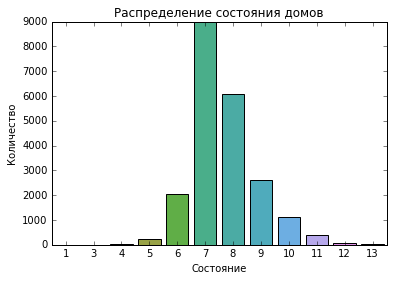

In [53]:
plt.figure(figsize=(6, 4))
sns.barplot(x=grade_counts.index, y=grade_counts.values)
plt.title('Распределение состояния домов')
plt.xlabel('Состояние')
plt.ylabel('Количество');
# plt.ticklabel_format(style='plain');  # Prevent scientific notation in matplotlib.pyplot
# plt.xlim (1899, 2016)
# plt.xticks(rotation=45)
# # Changing the tick frequency on the x or y axis
# # plt.xticks(np.arange(min(x), max(x)+1, 1.0))
# plt.xticks(np.arange(1900, 2015+1, 5.0));

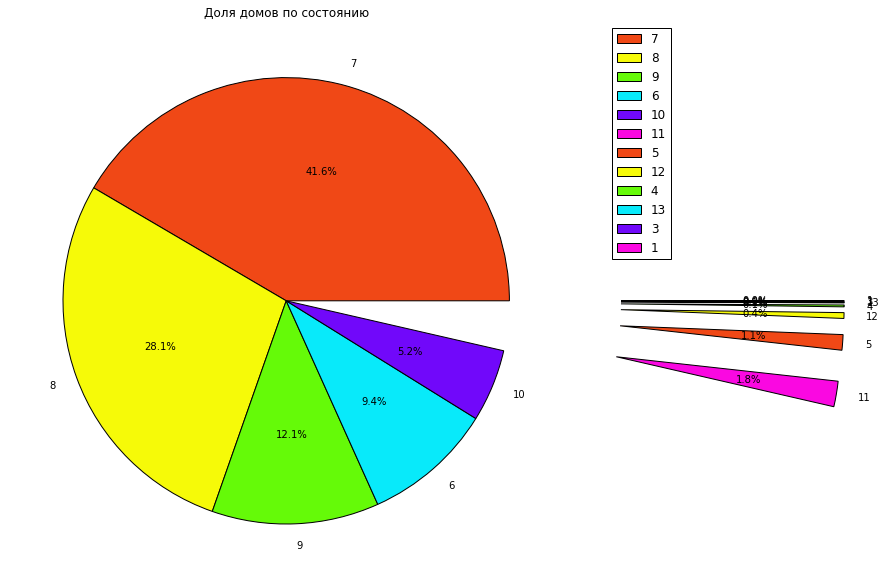

In [54]:
plt.figure(figsize=(10, 10))
explode = [0, 0, 0, 0, 0, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
# plt.pie(waterfront_counts, autopct='%1.1f%%')
plt.pie(grade_counts.values, autopct='%1.1f%%', labels=grade_counts.index, explode=explode, colors = ["#f04816", "#f6fa05fb", "#63fa05fb", "#05eafafb", "#6f05fafb", "#fa05e1fb", "#f04816", "#f6fa05fb", "#63fa05fb", "#05eafafb", "#6f05fafb", "#fa05e1fb",])
plt.title('Доля домов по состоянию')
plt.legend(grade_counts.index, loc='best', bbox_to_anchor=(0.7, 0.5, 0.5, 0.5)); # If a 4-tuple or BboxBase is given, then it specifies the bbox (x, y, width, height) that the legend is placed in. 

На пирожке сливаются 4,13,3,1 (даже если увеличить масштаб) - не подходит пирожок

### Задача 3

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.<br>
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

* до 0,2 - Очень слабая
* до 0,5 - Слабая
* до 0,7 - Средняя
* до 0,9 - Высокая
* свыше 0,9 - Очень высокая корреляция

In [55]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix)<=0.2] = 0
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


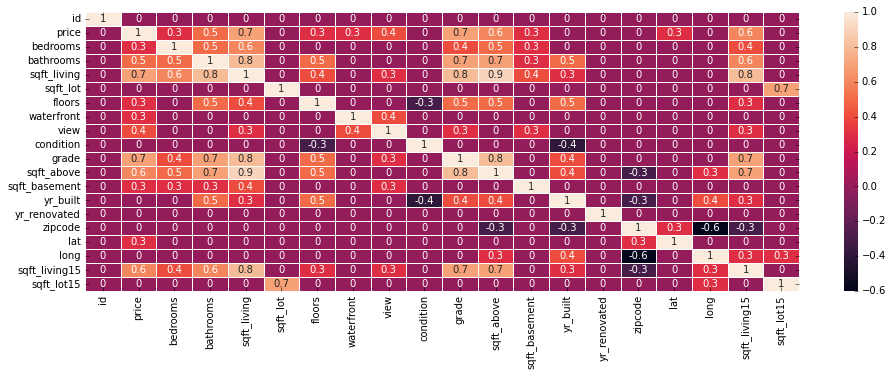

In [56]:
plt.figure(figsize = (16,5))
sns.heatmap(corr_matrix, annot=True, linewidths=.5);

Из тепловой карты видно, что средний коэффициент корреляции признак "price" имеет с 3-мя похожими признаками sqft_living (0.7) (sqft_above (0.6), sqft_living15 (0.6)), grade (0.7).<br>
Будем всё это проверять.

Признаки 'price' и 'sqft_living'

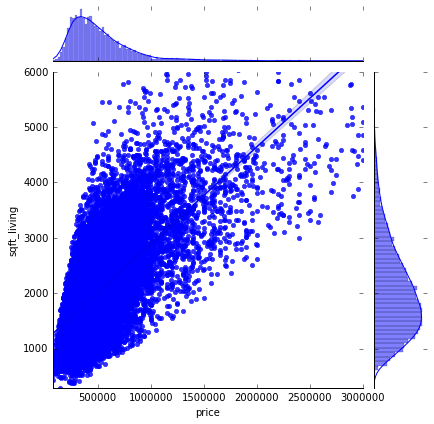

In [57]:
plot = sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg', height=6, ratio=5, space=0.2);
plot.ax_marg_x.set_xlim(75000, 3000000)
plot.ax_marg_y.set_ylim(290, 6000);

In [58]:
sns.set_style('darkgrid')
sns.set(font_scale=1.3)

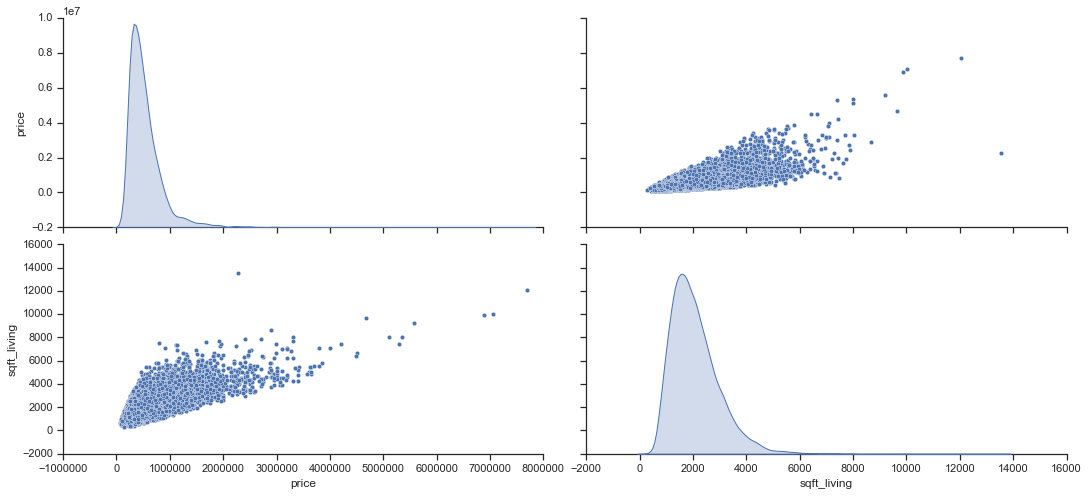

In [59]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df, vars=["price", "sqft_living"], diag_kind="kde", height=3.5, aspect=2.2)

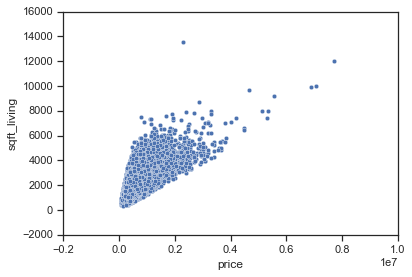

In [60]:
sns.set(style="ticks", color_codes=True)
sns.scatterplot(
    x='price', 
    y='sqft_living', 
    data=df)
plt.xlabel(
    'price')
plt.ylabel(
    'sqft_living');

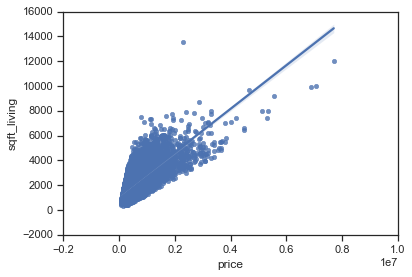

In [61]:
sns.regplot(
    x='price', 
    y='sqft_living',
    data=df)
plt.xlabel(
    'price')
plt.ylabel(
    'sqft_living');

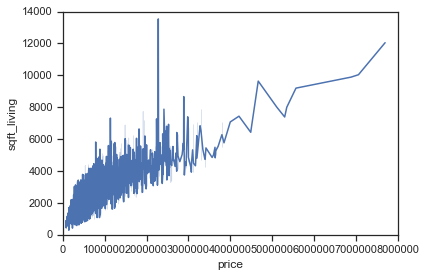

In [62]:
sns.lineplot(
    x='price', 
    y='sqft_living',
    data=df);

Вывод: Вероятно есть средняя линейная зависимость между признаками "price" и "sqft_living"

В дальнейшем для визуализации возможной линейной зависимости (корреляции) буду брать sns.jointplot и sns.pairplot.

Признаки 'price' и 'sqft_above'

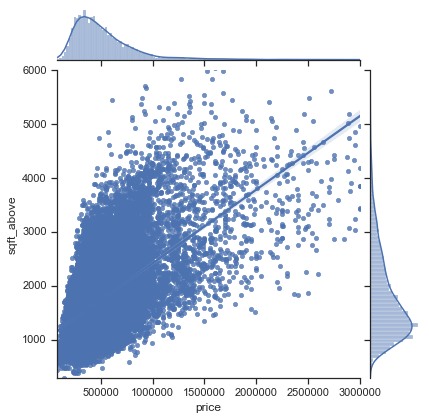

In [63]:
plot = sns.jointplot(x=df['price'], y=df['sqft_above'], kind='reg', height=6, ratio=5, space=0.2);
plot.ax_marg_x.set_xlim(75000, 3000000)
plot.ax_marg_y.set_ylim(290, 6000);

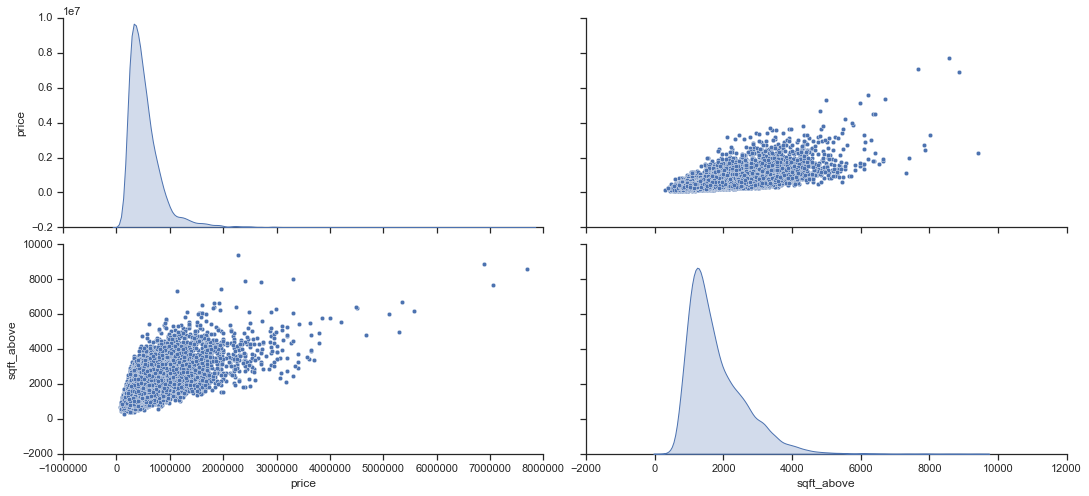

In [64]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df, vars=["price", "sqft_above"], diag_kind="kde", height=3.5, aspect=2.2)

Вывод: Вероятно есть средняя линейная зависимость между признаками "price" и "sqft_above"

Признаки 'price' и 'grade'

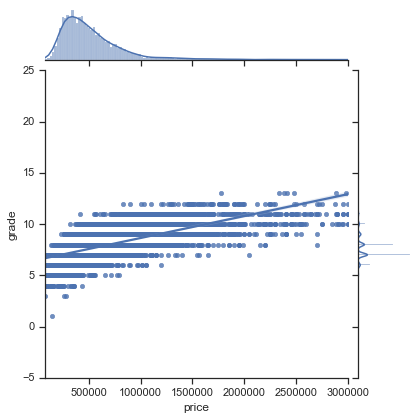

In [65]:
plot = sns.jointplot(x=df['price'], y=df['grade'], kind='reg', height=6, ratio=5, space=0.2);
plot.ax_marg_x.set_xlim(75000, 3000000);

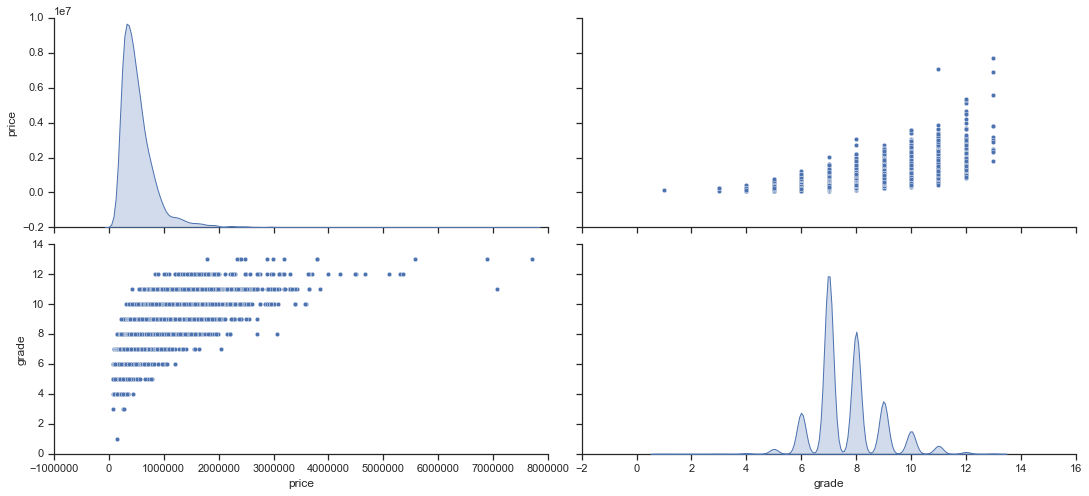

In [66]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df, vars=["price", "grade"], diag_kind="kde", height=3.5, aspect=2.2)

Вывод: Вероятно есть средняя линейная зависимость между признаками "price" и "grade"

Признаки 'price' и 'condition'

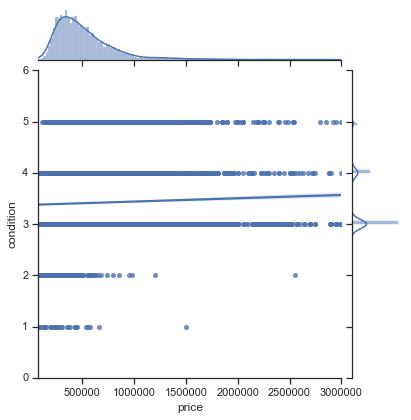

In [67]:
plot = sns.jointplot(x=df['price'], y=df['condition'], kind='reg', height=6, ratio=5, space=0.2);
plot.ax_marg_x.set_xlim(75000, 3000000);

Вывод: Что-то не видно вообще линейной зависимости между признаками "price" и "condition"

Признаки 'price' и 'bathrooms'

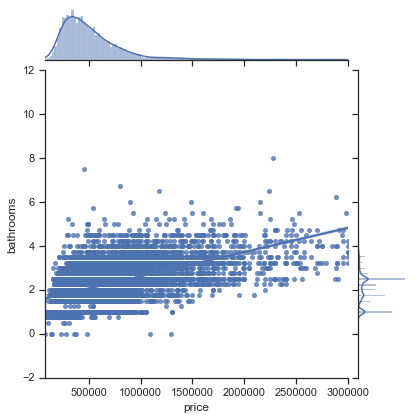

In [68]:
plot = sns.jointplot(x=df['price'], y=df['bathrooms'], kind='reg', height=6, ratio=5, space=0.2);
plot.ax_marg_x.set_xlim(75000, 3000000);

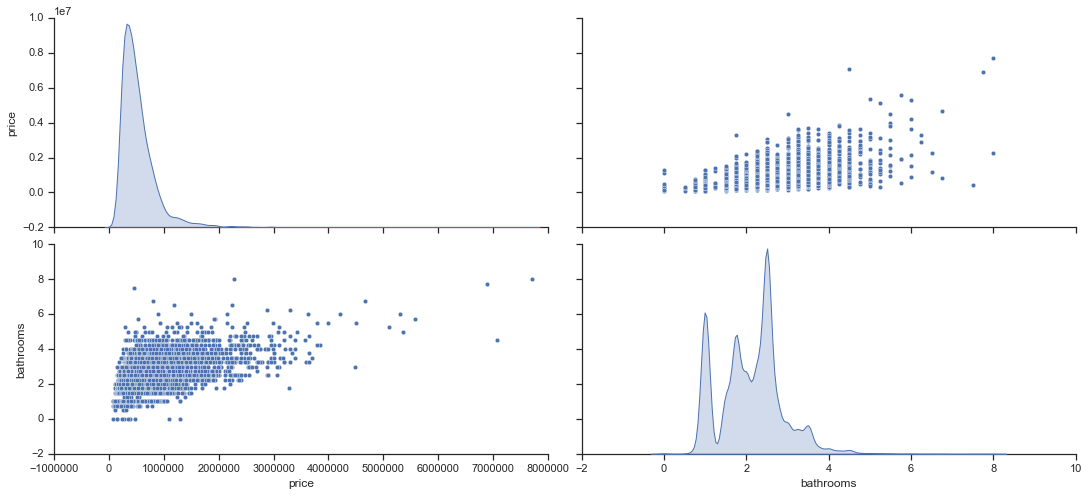

In [69]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df, vars=["price", "bathrooms"], diag_kind="kde", height=3.5, aspect=2.2)

Вывод: Слабая линейная зависимость между признаками "price" и "bathrooms"

Общий вывод по третей задаче: Как и предполагалось по heatmap есть вероятная средняя линейная зависимость для признака "price" от 3-ёх похожих признаков sqft_living (0.7) (sqft_above (0.6), sqft_living15 (0.6)) и grade (0.7).